<a href="https://colab.research.google.com/github/ElTaqui/1erParcial_IA/blob/main/Versiones/1erParcial_Taquichiri_Luis_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1er Parcial COM300 IA
Taquichiri Huarita Luis Alexander

####Importación de bibliotecas

In [66]:
#Para interactuar con el sistema operativo.
import os
#Para la manipulación y análisis de datos tabulares (DataFrames).
import pandas as pd
#Para realizar operaciones matemáticas y manipulación de arreglos/matrices.
import numpy as np
#Para la creación de gráficos y visualización de datos.
from matplotlib import pyplot
import matplotlib.pyplot as plt

%matplotlib inline

Cargar y revisar el data set

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/machine learning/datasets/Player_Attributes.csv', delimiter=',', decimal='.')
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177037 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   177037 non-null  int64  
 1   player_fifa_api_id   177037 non-null  int64  
 2   player_api_id        177037 non-null  int64  
 3   date                 177037 non-null  object 
 4   overall_rating       177037 non-null  float64
 5   potential            177037 non-null  float64
 6   preferred_foot       177037 non-null  object 
 7   attacking_work_rate  177037 non-null  object 
 8   defensive_work_rate  177037 non-null  object 
 9   crossing             177037 non-null  float64
 10  finishing            177037 non-null  float64
 11  heading_accuracy     177037 non-null  float64
 12  short_passing        177037 non-null  float64
 13  volleys              177037 non-null  float64
 14  dribbling            177037 non-null  float64
 15  curve                1

####Arreglo del Data set

Cargar datos

In [69]:
#Cargar los datos en un data set limpio y más fácil de manejar
nuevo_data = data.iloc[:20000, [4,5,9,10,11,12,13,14,15,16,17]]
#convertir los datos para tener clases dividiendo los jugadores en: muy malos, malos, neutro, buenos y muy buenos (0,1,2,3,4)
first = np.zeros(nuevo_data.shape[0])
for i in range(nuevo_data.shape[0]):
  if nuevo_data.iloc[i,0] <= 20:
    first[i] = 0
  elif nuevo_data.iloc[i,0] <= 40:
    first[i] = 1
  elif nuevo_data.iloc[i,0] <= 60:
    first[i] = 2
  elif nuevo_data.iloc[i,0] <= 80:
    first[i] = 3
  else:
    first[i] = 4
#print(nuevo_data.iloc[100:200,0])
nuevo_data.iloc[:,0] = first
#print(nuevo_data.iloc[100:200,0])

In [70]:
print(nuevo_data)

       overall_rating  potential  crossing  finishing  heading_accuracy  \
0                 3.0       71.0      49.0       44.0              71.0   
1                 3.0       71.0      49.0       44.0              71.0   
2                 3.0       66.0      49.0       44.0              71.0   
3                 3.0       65.0      48.0       43.0              70.0   
4                 3.0       65.0      48.0       43.0              70.0   
...               ...        ...       ...        ...               ...   
20686             3.0       70.0      63.0       55.0              56.0   
20687             3.0       69.0      63.0       44.0              56.0   
20688             3.0       67.0      63.0       44.0              56.0   
20689             3.0       73.0      62.0       72.0              58.0   
20690             3.0       73.0      62.0       72.0              58.0   

       short_passing  volleys  dribbling  curve  free_kick_accuracy  \
0               61.0     44.

Insertar atributos de: carácter, texto y valores booleanos

In [71]:
def agregarCTB(data):
  # Agregar atributos de texto (posición del jugador)
  positions = ['Defensor', 'MedioCampista', 'Delantero', 'Portería']
  data['Posición'] = np.random.choice(positions, data.shape[0])
  # Agregar atributos de caracteres (Grupo: A, B, C, D)
  Groups = ['A', 'B', 'C', 'D']
  data['Grupo'] = np.random.choice(Groups, data.shape[0])
  # Agregar atributos booleanos (¿Es titular?)
  data['Es titular?'] = np.random.choice([True, False], data.shape[0])

In [72]:
agregarCTB(nuevo_data)
print(nuevo_data)

       overall_rating  potential  crossing  finishing  heading_accuracy  \
0                 3.0       71.0      49.0       44.0              71.0   
1                 3.0       71.0      49.0       44.0              71.0   
2                 3.0       66.0      49.0       44.0              71.0   
3                 3.0       65.0      48.0       43.0              70.0   
4                 3.0       65.0      48.0       43.0              70.0   
...               ...        ...       ...        ...               ...   
20686             3.0       70.0      63.0       55.0              56.0   
20687             3.0       69.0      63.0       44.0              56.0   
20688             3.0       67.0      63.0       44.0              56.0   
20689             3.0       73.0      62.0       72.0              58.0   
20690             3.0       73.0      62.0       72.0              58.0   

       short_passing  volleys  dribbling  curve  free_kick_accuracy  \
0               61.0     44.

Duplicado de los datos del data set

In [73]:
#como los datos son de jugadores de futbol y no hay forma de hacer una corelación exacta usaré
#un numero random para aumentar o restar del valor original haciendo una variación que no afecte mucho
#manteniendo las clases y ramdomificando los datos de otro tipo con la función
data_duplicado = pd.DataFrame()
data_duplicado['overall_rating'] = nuevo_data.iloc[:,0]
for j in range(1,11):
  temp = []
  for i in range(nuevo_data.shape[0]):
    temp.append(nuevo_data.iloc[i, j] + np.random.uniform(-3, 3))
  data_duplicado[nuevo_data.columns[j]] = temp

In [74]:
agregarCTB(data_duplicado)
print(data_duplicado)

       overall_rating  potential   crossing  finishing  heading_accuracy  \
0                 3.0  68.309365  51.564797  45.397084         68.091485   
1                 3.0  68.925051  51.453460  45.728965         71.895195   
2                 3.0  67.618005  51.486875  41.216051         72.359515   
3                 3.0  65.832751  45.824574  42.553016         71.060217   
4                 3.0  66.521992  49.168733  41.453908         71.135473   
...               ...        ...        ...        ...               ...   
20686             3.0  69.264596  63.931389  54.257138         55.277501   
20687             3.0  66.397730  64.000212  45.413404         53.128181   
20688             3.0  64.629722  61.269432  44.876549         55.864444   
20689             3.0  71.406659  59.313266  71.594180         58.299721   
20690             3.0  72.722603  60.797619  73.029754         59.193768   

       short_passing    volleys  dribbling      curve  free_kick_accuracy  \
0         

Función para visualizar datos en un eje

In [75]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Centros')
    pyplot.xlabel('Potencial')

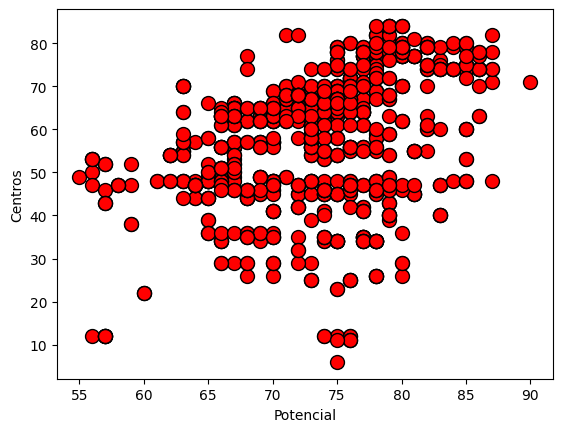

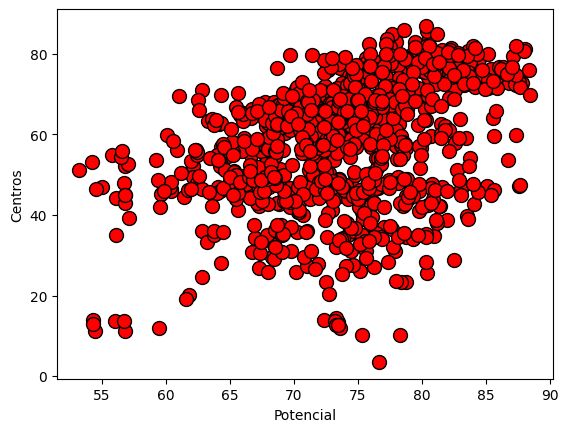

In [76]:
plotData(nuevo_data.iloc[:1000,1], nuevo_data.iloc[:1000,2])
plotData(data_duplicado.iloc[:1000,1], data_duplicado.iloc[:1000,2])

Juntar los dataset inicial y sintetico en un solo data set

In [77]:
def intercalar_filas(df1, df2):
    # Concatenar los DataFrames fila por fila alternadamente
    df_combined = pd.DataFrame()
    for i in range(df1.shape[0]):
        df_combined = pd.concat([df_combined, df1.iloc[[i]], df2.iloc[[i]]], ignore_index=True)
    return df_combined

In [78]:
data_final = intercalar_filas(nuevo_data, data_duplicado)
print(data_final)

       overall_rating  potential   crossing  finishing  heading_accuracy  \
0                 3.0  71.000000  49.000000  44.000000         71.000000   
1                 3.0  68.309365  51.564797  45.397084         68.091485   
2                 3.0  71.000000  49.000000  44.000000         71.000000   
3                 3.0  68.925051  51.453460  45.728965         71.895195   
4                 3.0  66.000000  49.000000  44.000000         71.000000   
...               ...        ...        ...        ...               ...   
39995             3.0  64.629722  61.269432  44.876549         55.864444   
39996             3.0  73.000000  62.000000  72.000000         58.000000   
39997             3.0  71.406659  59.313266  71.594180         58.299721   
39998             3.0  73.000000  62.000000  72.000000         58.000000   
39999             3.0  72.722603  60.797619  73.029754         59.193768   

       short_passing    volleys  dribbling      curve  free_kick_accuracy  \
0         

####Cargar datos en variables para usar

Voy a ignorar los datos de caracteres, texto y boleanos ya que fueron agregados de forma randomica y pueden afectar de manera negativa a las prediciciónes además que son datos que no se pueden procesar en una regresión se tendrían que cambiar a datos numericos, como perjudican más de lo que ayudan en la precisión de entrenamiento los dejaré fuera

In [79]:
X = data_final.iloc[:32000, 1:11]
y = data_final.iloc[:32000, 0]
m = y.size
X_prueb = data_final.iloc[32000:40000, 1:11]
y_prueb = data_final.iloc[32000:40000, 0]
m_prueb = y_prueb.size
num_labels = 5
print (X)
print (y)
print (X_prueb)
print (y_prueb)

       potential   crossing  finishing  heading_accuracy  short_passing  \
0      71.000000  49.000000  44.000000         71.000000      61.000000   
1      68.309365  51.564797  45.397084         68.091485      62.520204   
2      71.000000  49.000000  44.000000         71.000000      61.000000   
3      68.925051  51.453460  45.728965         71.895195      60.210034   
4      66.000000  49.000000  44.000000         71.000000      61.000000   
...          ...        ...        ...               ...            ...   
31995  90.865625  77.231819  83.028149         49.941434      81.548884   
31996  88.000000  80.000000  83.000000         50.000000      84.000000   
31997  85.975044  79.243842  80.396019         50.752407      81.711095   
31998  88.000000  80.000000  83.000000         54.000000      84.000000   
31999  86.374483  77.170413  80.136123         51.454230      82.019647   

         volleys  dribbling      curve  free_kick_accuracy  long_passing  
0      44.000000  51.000

##Modelo de regresión logistica

Función de normalización

In [80]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Normalización de datos de entrenamiento y prueba

In [81]:
X_norm, mu, sigma = featureNormalize(X)
X_prueb_norm, mu_prueb, sigma_prueb = featureNormalize(X_prueb)

Función de activación Sigmoide

In [82]:
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g

Concatenamos x0 para los datos de entrenamiento y los datos de prueba

In [83]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
X_prueb = np.concatenate([np.ones((m_prueb, 1)), X_prueb], axis=1)

Función de costo de la regresión lineal logistica

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

es la función binary cross entropy

In [84]:
def calcularCosto(theta, X, y):
    m = y.size
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

Función que por medio de repeticiones logra sacar la mejor theta posible mediante el descenso por la gradiente

In [85]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        #Actualiza los parametros de theta con la formula del descenso por la gradiente
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))

    return theta, J_history

Función que saca las precciones con sigmoide de los datos que le pasemos

In [86]:
def prediccion(theta, X):
    m = X.shape[0]
    p = np.zeros(m)
    p = np.round(sigmoid(X.dot(theta.T)))
    return p

###Ejecución de las funciones en cada caso y su prueba de eficacia

funcion que devuelve un array de datos convertidoa a 0 o 1 según la clase

In [87]:
def covertirbin(clase,x):
  m = x.shape[0]
  yb = np.zeros(m)
  for i in range(m):
    if x.iloc[i] == clase:
      yb[i] = 1
    else:
      yb[i] = 0
  return yb

####Primera clase (0)

ultimo J:  0.008562818299908181
--------------------------------------------------------------------------
theta calculado por el descenso por el gradiente: [-4.75604144e+00  2.17157917e-15 -1.21890165e-15  9.16972887e-16
 -5.92981081e-16  9.67158541e-16 -1.34115885e-15 -7.42810258e-16
  1.26322786e-15 -4.44831463e-16 -3.69010785e-16]
--------------------------------------------------------------------------


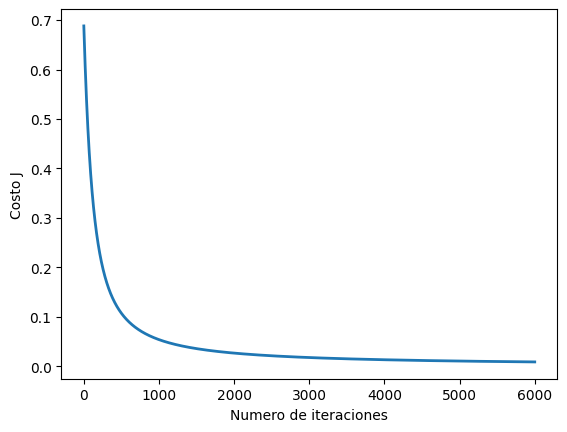

In [88]:
y_0 = covertirbin(0,y)
y_prueb_0 = covertirbin(0,y_prueb)

alpha = 0.02
num_iters = 6000
theta_0 = np.zeros(X.shape[1])
theta_0, J_history = descensoGradiente(theta_0, X, y_0, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('ultimo J: ',J_history[-1])
print('--------------------------------------------------------------------------')
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta_0)))
print('--------------------------------------------------------------------------')

In [89]:
p = prediccion(theta_0, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_0) * 100))
print(p[1000:1020])
print(y_0[1000:1020])

Precisión de entrenamiento: 100.00 %
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [90]:
p = prediccion(theta_0, X_prueb)
print('Precisión de los datos de prueba: {:.2f} %'.format(np.mean(p == y_prueb_0) * 100))
print(p[1000:1020])
print(y_prueb_0[1000:1020])

Precisión de los datos de prueba: 100.00 %
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


####Segunda clase (1)

ultimo J:  0.008152458711450325
--------------------------------------------------------------------------
theta calculado por el descenso por el gradiente: [-4.96616876e+00 -3.42494716e-02 -1.11256096e-02  2.33898756e-03
 -1.62351132e-02 -1.16407187e-02 -1.40985250e-02 -1.53996958e-02
  2.31923225e-02  2.30679876e-02 -1.40607122e-02]
--------------------------------------------------------------------------


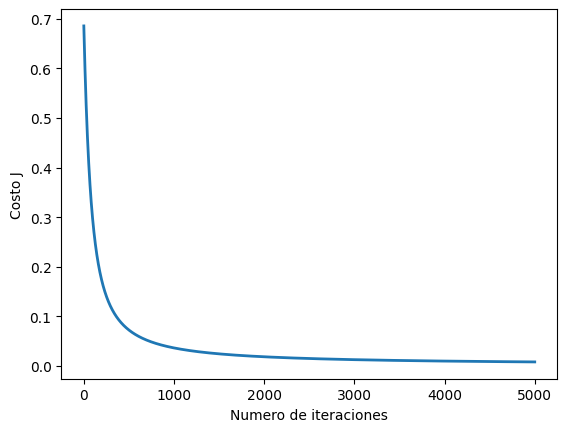

In [91]:
y_1 = covertirbin(1,y)
y_prueb_1 = covertirbin(1,y_prueb)

alpha = 0.03
num_iters = 5000
theta_1 = np.zeros(X.shape[1])
theta_1, J_history = descensoGradiente(theta_1, X, y_1, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('ultimo J: ',J_history[-1])
print('--------------------------------------------------------------------------')
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta_1)))
print('--------------------------------------------------------------------------')

In [92]:
p = prediccion(theta_1, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_1) * 100))
print(p[1000:1020])
print(y_1[1000:1020])

Precisión de entrenamiento: 99.98 %
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [93]:
p = prediccion(theta_1, X_prueb)
print('Precisión de los datos de prueba: {:.2f} %'.format(np.mean(p == y_prueb_1) * 100))
print(p[1000:1020])
print(y_prueb_1[1000:1020])

Precisión de los datos de prueba: 99.92 %
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


####Tercera clase (2)

ultimo J:  0.23557199991443997
--------------------------------------------------------------------------
theta calculado por el descenso por el gradiente: [-3.04680457 -1.45520073 -0.1306358   0.09602962 -0.38610511 -0.11379788
  0.0312522   0.29597662 -0.05215936 -0.40657197 -0.20657639]
--------------------------------------------------------------------------


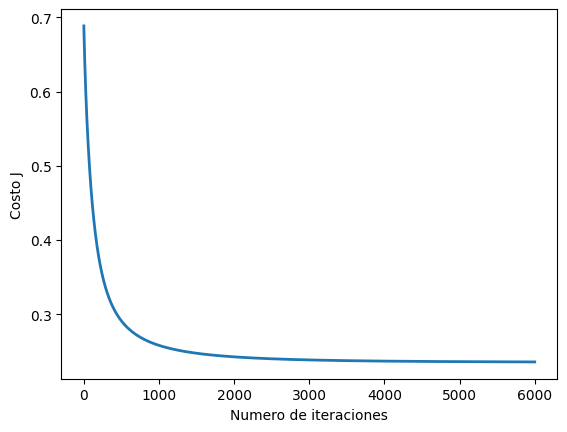

In [94]:
y_2 = covertirbin(2,y)
y_prueb_2 = covertirbin(2,y_prueb)

alpha = 0.02
num_iters = 6000
theta_2 = np.zeros(X.shape[1])
theta_2, J_history = descensoGradiente(theta_2, X, y_2, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('ultimo J: ',J_history[-1])
print('--------------------------------------------------------------------------')
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta_2)))
print('--------------------------------------------------------------------------')

In [95]:
p = prediccion(theta_2, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_2) * 100))
print(p[1000:1020])
print(y_2[1000:1020])

Precisión de entrenamiento: 90.62 %
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [96]:
p = prediccion(theta_2, X_prueb)
print('Precisión de los datos de prueba: {:.2f} %'.format(np.mean(p == y_prueb_2) * 100))
print(p[1000:1020])
print(y_prueb_2[1000:1020])

Precisión de los datos de prueba: 85.55 %
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]


####Cuarta clase (3)

ultimo J:  0.40695306120318847
--------------------------------------------------------------------------
theta calculado por el descenso por el gradiente: [ 1.80840839  0.36845241  0.09194536 -0.06899199  0.32014033  0.13372396
 -0.26864178 -0.03517689  0.05203297  0.12075008  0.00983259]
--------------------------------------------------------------------------


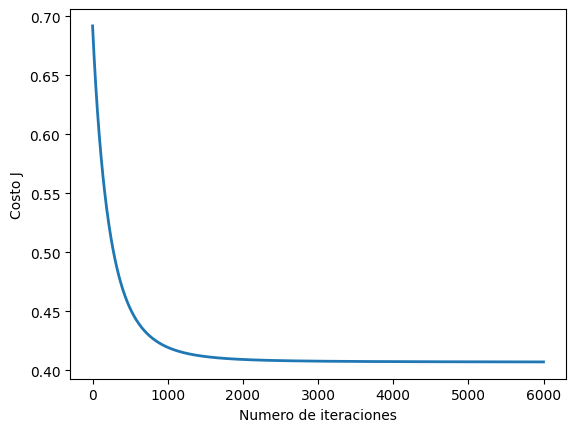

In [97]:
y_3 = covertirbin(3,y)
y_prueb_3 = covertirbin(3,y_prueb)

alpha = 0.01
num_iters = 6000
theta_3 = np.zeros(X.shape[1])
theta_3, J_history = descensoGradiente(theta_3, X, y_3, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('ultimo J: ',J_history[-1])
print('--------------------------------------------------------------------------')
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta_3)))
print('--------------------------------------------------------------------------')


In [98]:
p = prediccion(theta_3, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_3) * 100))
print(p[1000:1020])
print(y_3[1000:1020])

Precisión de entrenamiento: 84.69 %
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [99]:
p = prediccion(theta_3, X_prueb)
print('Precisión de los datos de prueba: {:.2f} %'.format(np.mean(p == y_prueb_3) * 100))
print(p[1000:1020])
print(y_prueb_3[1000:1020])

Precisión de los datos de prueba: 80.08 %
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.]


####Quinta clase (4)

ultimo J:  0.0868687883902841
--------------------------------------------------------------------------
theta calculado por el descenso por el gradiente: [-4.74716445e+00  1.67431721e+00 -1.11291567e-01 -3.19821208e-03
  3.02960860e-01  2.63258872e-01  4.16904755e-01 -1.24896564e-01
 -1.76340422e-03  1.77206324e-01  4.12631332e-01]
--------------------------------------------------------------------------


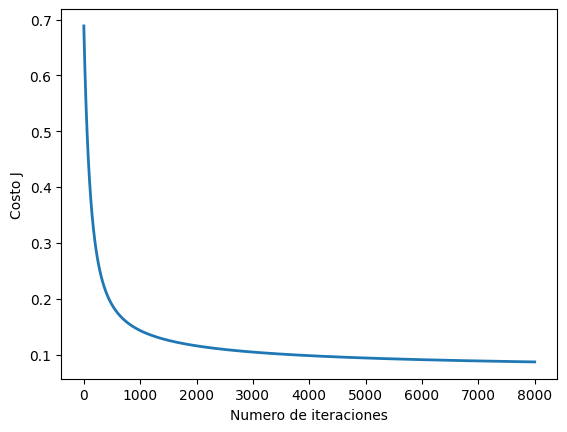

In [100]:
y_4 = covertirbin(4,y)
y_prueb_4 = covertirbin(4,y_prueb)

alpha = 0.02
num_iters = 8000
theta_4 = np.zeros(X.shape[1])
theta_4, J_history = descensoGradiente(theta_4, X, y_4, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('ultimo J: ',J_history[-1])
print('--------------------------------------------------------------------------')
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta_4)))
print('--------------------------------------------------------------------------')

In [101]:
p = prediccion(theta_4, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_4) * 100))
print(p[1000:1020])
print(y_4[1000:1020])

Precisión de entrenamiento: 96.74 %
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [102]:
p = prediccion(theta_4, X_prueb)
print('Precisión de los datos de prueba: {:.2f} %'.format(np.mean(p == y_prueb_4) * 100))
print(p[1000:1020])
print(y_prueb_4[1000:1020])

Precisión de los datos de prueba: 5.40 %
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


##Modelo One vs All

Funcion que calcula el costo binary cross entropy más término de regularización

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)} \log \left(h_\theta\left(x^{(i)} \right)\right) - \left( 1 - y^{(i)} \right) \log\left(1 - h_\theta \left(x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$


y entrena los thetas


In [103]:
def lrCostFunction(theta, X, y, lambda_):
    m = y.size
    h = sigmoid(X.dot(theta))

    # Función de costo binary cross entropy con regularización
    cost = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h)) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    # Gradiente con regularización
    grad = (1 / m) * X.T.dot(h - y)
    grad[1:] += (lambda_ / m) * theta[1:]

    return cost, grad

Descenso por la gradiente para calcular por numpy

In [104]:
def gradientDescent(X, y, initial_theta, alpha, num_iters, lambda_):

    theta = initial_theta.copy()
    m = y.size
    J_history = []

#Hace iteraciones para encontrar los theta optimos con los parametros que le pasemos
    for _ in range(num_iters):
        #aplicación de la funcion de costo
        cost, grad = lrCostFunction(theta, X, y, lambda_)
        #Minimización de la función de costo: El gradiente grad apunta en la dirección de mayor aumento de la función de costo.
        #Al restar este gradiente (theta -= ...), estamos actualizando los parámetros en la dirección opuesta,
        #lo que ayuda a minimizar la función de costo.
        theta -= alpha * grad
        #Guarda el costo del calculo de theta para x clase
        J_history.append(cost)

    return theta, J_history


Funcion para calcular todas las thetas es decir las diferentes thetas para cada clase

Entrena un clasificador de regresión logística para un problema de clasificación multiclase usando el enfoque One-vs-All

In [105]:
def oneVsAll(X, y, num_labels, alpha, num_iters, lambda_):

    m, n = X.shape
    all_theta = np.zeros((num_labels, n))
    J_history_all = []

    for c in range(num_labels):
      #muesta mensaje indicando el numero de clase
      print(f"Entrenando clase {c+1} de {num_labels}...")
      #convierte los datos en boleanos y luego en enteros de nuevo dependiendo de la clase que estemos evaluando
      y_c = (y == c).astype(int)
      initial_theta = np.zeros(n)

      theta, J_history = gradientDescent(X, y_c, initial_theta, alpha, num_iters, lambda_)
      #agrega los thetas encontrados al total de thetas
      all_theta[c] = theta
      #total de costos
      J_history_all.append(J_history)

      # Graficar J_history para la clase actual
      plt.plot(J_history, label=f'Clase {c+1}')

    plt.xlabel('Número de Iteraciones')
    plt.ylabel('Costo')
    plt.title('Historial del Costo para cada Clase')
    plt.legend()
    plt.show()

    return all_theta

Aplicación del las funciones

Entrenando clase 1 de 5...
Entrenando clase 2 de 5...
Entrenando clase 3 de 5...
Entrenando clase 4 de 5...
Entrenando clase 5 de 5...


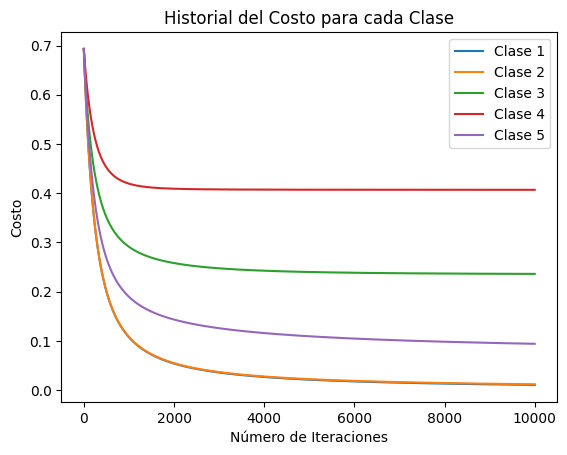

In [106]:
alpha = 0.01
num_iters = 10000
lambda_ = 0.01
all_theta = oneVsAll(X, y, num_labels, alpha, num_iters, lambda_)

In [107]:
print('thetas one vs all: ',all_theta)
print('---------------------------------------------')
print('thetas regreción logistica: ')
print(theta_0)
print(theta_1)
print(theta_2)
print(theta_3)
print(theta_4)

thetas one vs all:  [[-4.56902896e+00  2.17427783e-15 -1.20574176e-15  8.89780195e-16
  -5.85929485e-16  9.32943823e-16 -1.31232308e-15 -7.19126245e-16
   1.22634923e-15 -4.34221624e-16 -3.53861360e-16]
 [-4.55688353e+00 -2.29018382e-02 -7.45240735e-03  1.54351260e-03
  -1.08949142e-02 -7.82096552e-03 -9.42194313e-03 -1.03168745e-02
   1.54812916e-02  1.54116586e-02 -9.42532918e-03]
 [-2.99261751e+00 -1.41330217e+00 -1.13250033e-01  9.29663612e-02
  -3.72808956e-01 -1.23780676e-01  3.28175933e-02  2.63882047e-01
  -5.31881327e-02 -3.76830708e-01 -2.05962289e-01]
 [ 1.81588929e+00  3.75681354e-01  1.05385052e-01 -5.21913959e-02
   3.30559581e-01  1.40397906e-01 -3.18566460e-01 -4.78101477e-02
   6.51897381e-02  1.45595752e-01 -1.41952534e-02]
 [-4.19947529e+00  1.37231825e+00 -7.81947693e-02  2.45740552e-02
   2.30223915e-01  2.16758635e-01  3.38562551e-01 -7.19852475e-02
   2.47299701e-03  1.50525754e-01  3.41204815e-01]]
---------------------------------------------
thetas regreción l

Función para predecir one vs All


In [108]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)
    # Calcula las probabilidades de cada clase usando la función sigmoide y el producto de matrices
    # entre X y los parámetros transpuestos (all_theta.T)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)
    #La función np.argmax selecciona la clase con la probabilidad más alta para cada ejemplo.
    #axis=1 indica que la búsqueda se realiza a lo largo del eje de las clases.
    return p

Calculo de efectividad con los datos de entrenamiento

In [109]:
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
print("------------------------------------------------------------------------")
print("Datos comparados:")
print(pred[1000:1100])
print(y[1000:1100])

Precision del conjuto de entrenamiento: 85.99%
------------------------------------------------------------------------
Datos comparados:
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 2 2 2 3 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
1000    3.0
1001    3.0
1002    3.0
1003    3.0
1004    3.0
       ... 
1095    3.0
1096    3.0
1097    3.0
1098    3.0
1099    3.0
Name: overall_rating, Length: 100, dtype: float64


Calculo de efectividad con los datos de prueba

In [110]:
pred_prueba = predictOneVsAll(all_theta, X_prueb)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred_prueba == y_prueb) * 100))
print("------------------------------------------------------------------------")
print("Datos comparados:")
print(pred_prueba[:100])
print(y_prueb[:100])

Precision del conjuto de entrenamiento: 76.65%
------------------------------------------------------------------------
Datos comparados:
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3]
32000    4.0
32001    4.0
32002    4.0
32003    4.0
32004    4.0
        ... 
32095    3.0
32096    3.0
32097    3.0
32098    3.0
32099    3.0
Name: overall_rating, Length: 100, dtype: float64
